<a href="https://colab.research.google.com/github/Tdas-christ/CV/blob/main/Tanisha_2348569_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# All Geometric transformations
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [31]:
#read and convert the iamge in to gray
img = rgb2gray(imread('/content/drive/MyDrive/IMAGES (CV)/cow.jpeg'))
w, h = img.shape

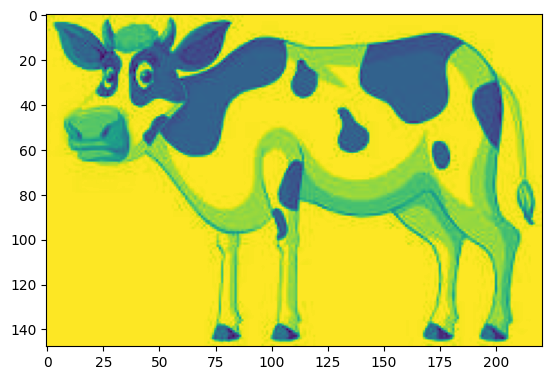

In [32]:
#Apply identity transform:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_identity)

plt.imshow(img1)

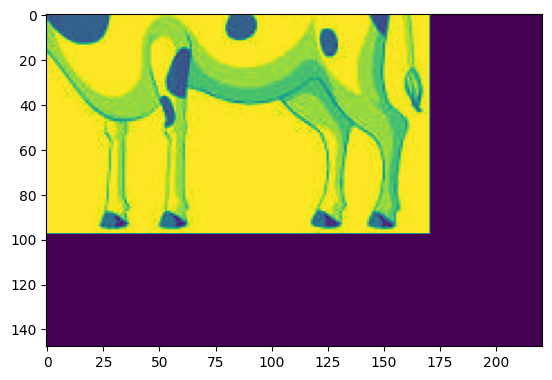

In [33]:
#Apply reflection transform
# Translation
tx,ty=50,50
mat_translate = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
img2 = ndi.affine_transform(img, mat_translate) # offset=(0,h)
plt.imshow(img2)

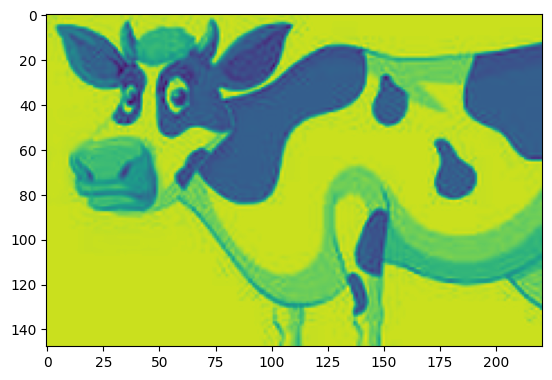

In [34]:
#Scale the image (0.75 times along the x axis and 1.25 times along the y axis):
s_x, s_y = 0.75, 0.75
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img3 = ndi.affine_transform(img, mat_scale)
plt.imshow(img3)

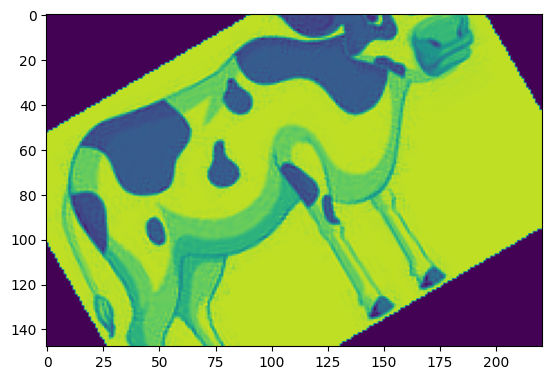

In [35]:
#Rotate the image by 30° counter-clockwise.
#It's a composite operation—first, you will need to shift/center the image, apply rotation, and then apply inverse shift:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-
w/2],[0,1,-h/2],[0,0,1]])
img4 = ndi.affine_transform(img1, mat_rotate)
plt.imshow(img4)

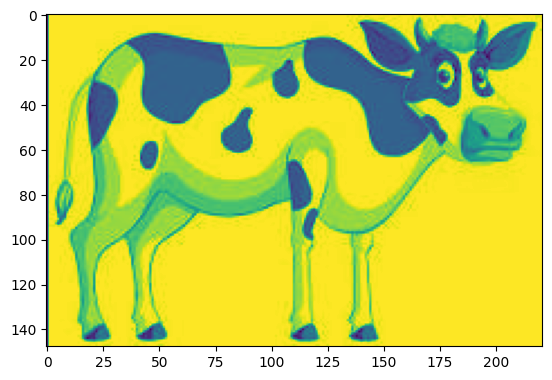

In [36]:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img5 = ndi.affine_transform(img, mat_reflect) # offset=(0,h)
plt.imshow(img5)

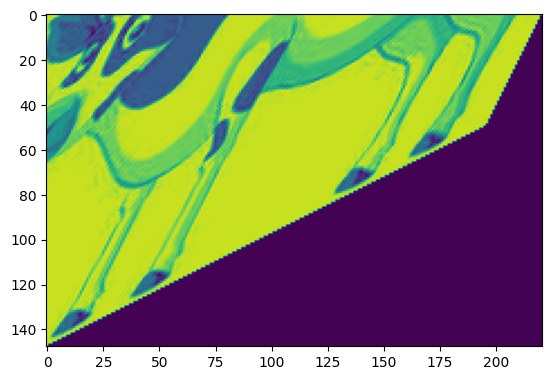

In [37]:
#Apply shear transform to the image:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img5 = ndi.affine_transform(img1, mat_shear)

plt.imshow(img5)

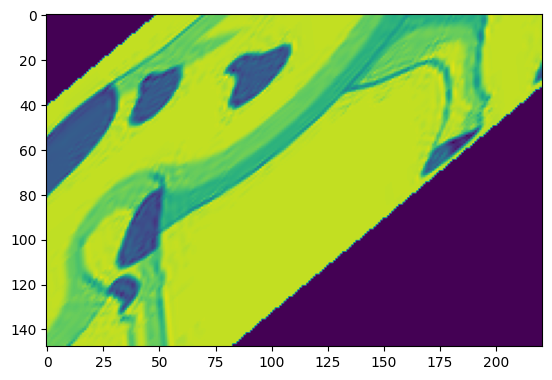

In [38]:
#Finally apply all of the transforms together, in sequence:

mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
final=ndi.affine_transform(img, mat_all)
plt.imshow(final)

Text(0.5, 1.0, 'Translated image')

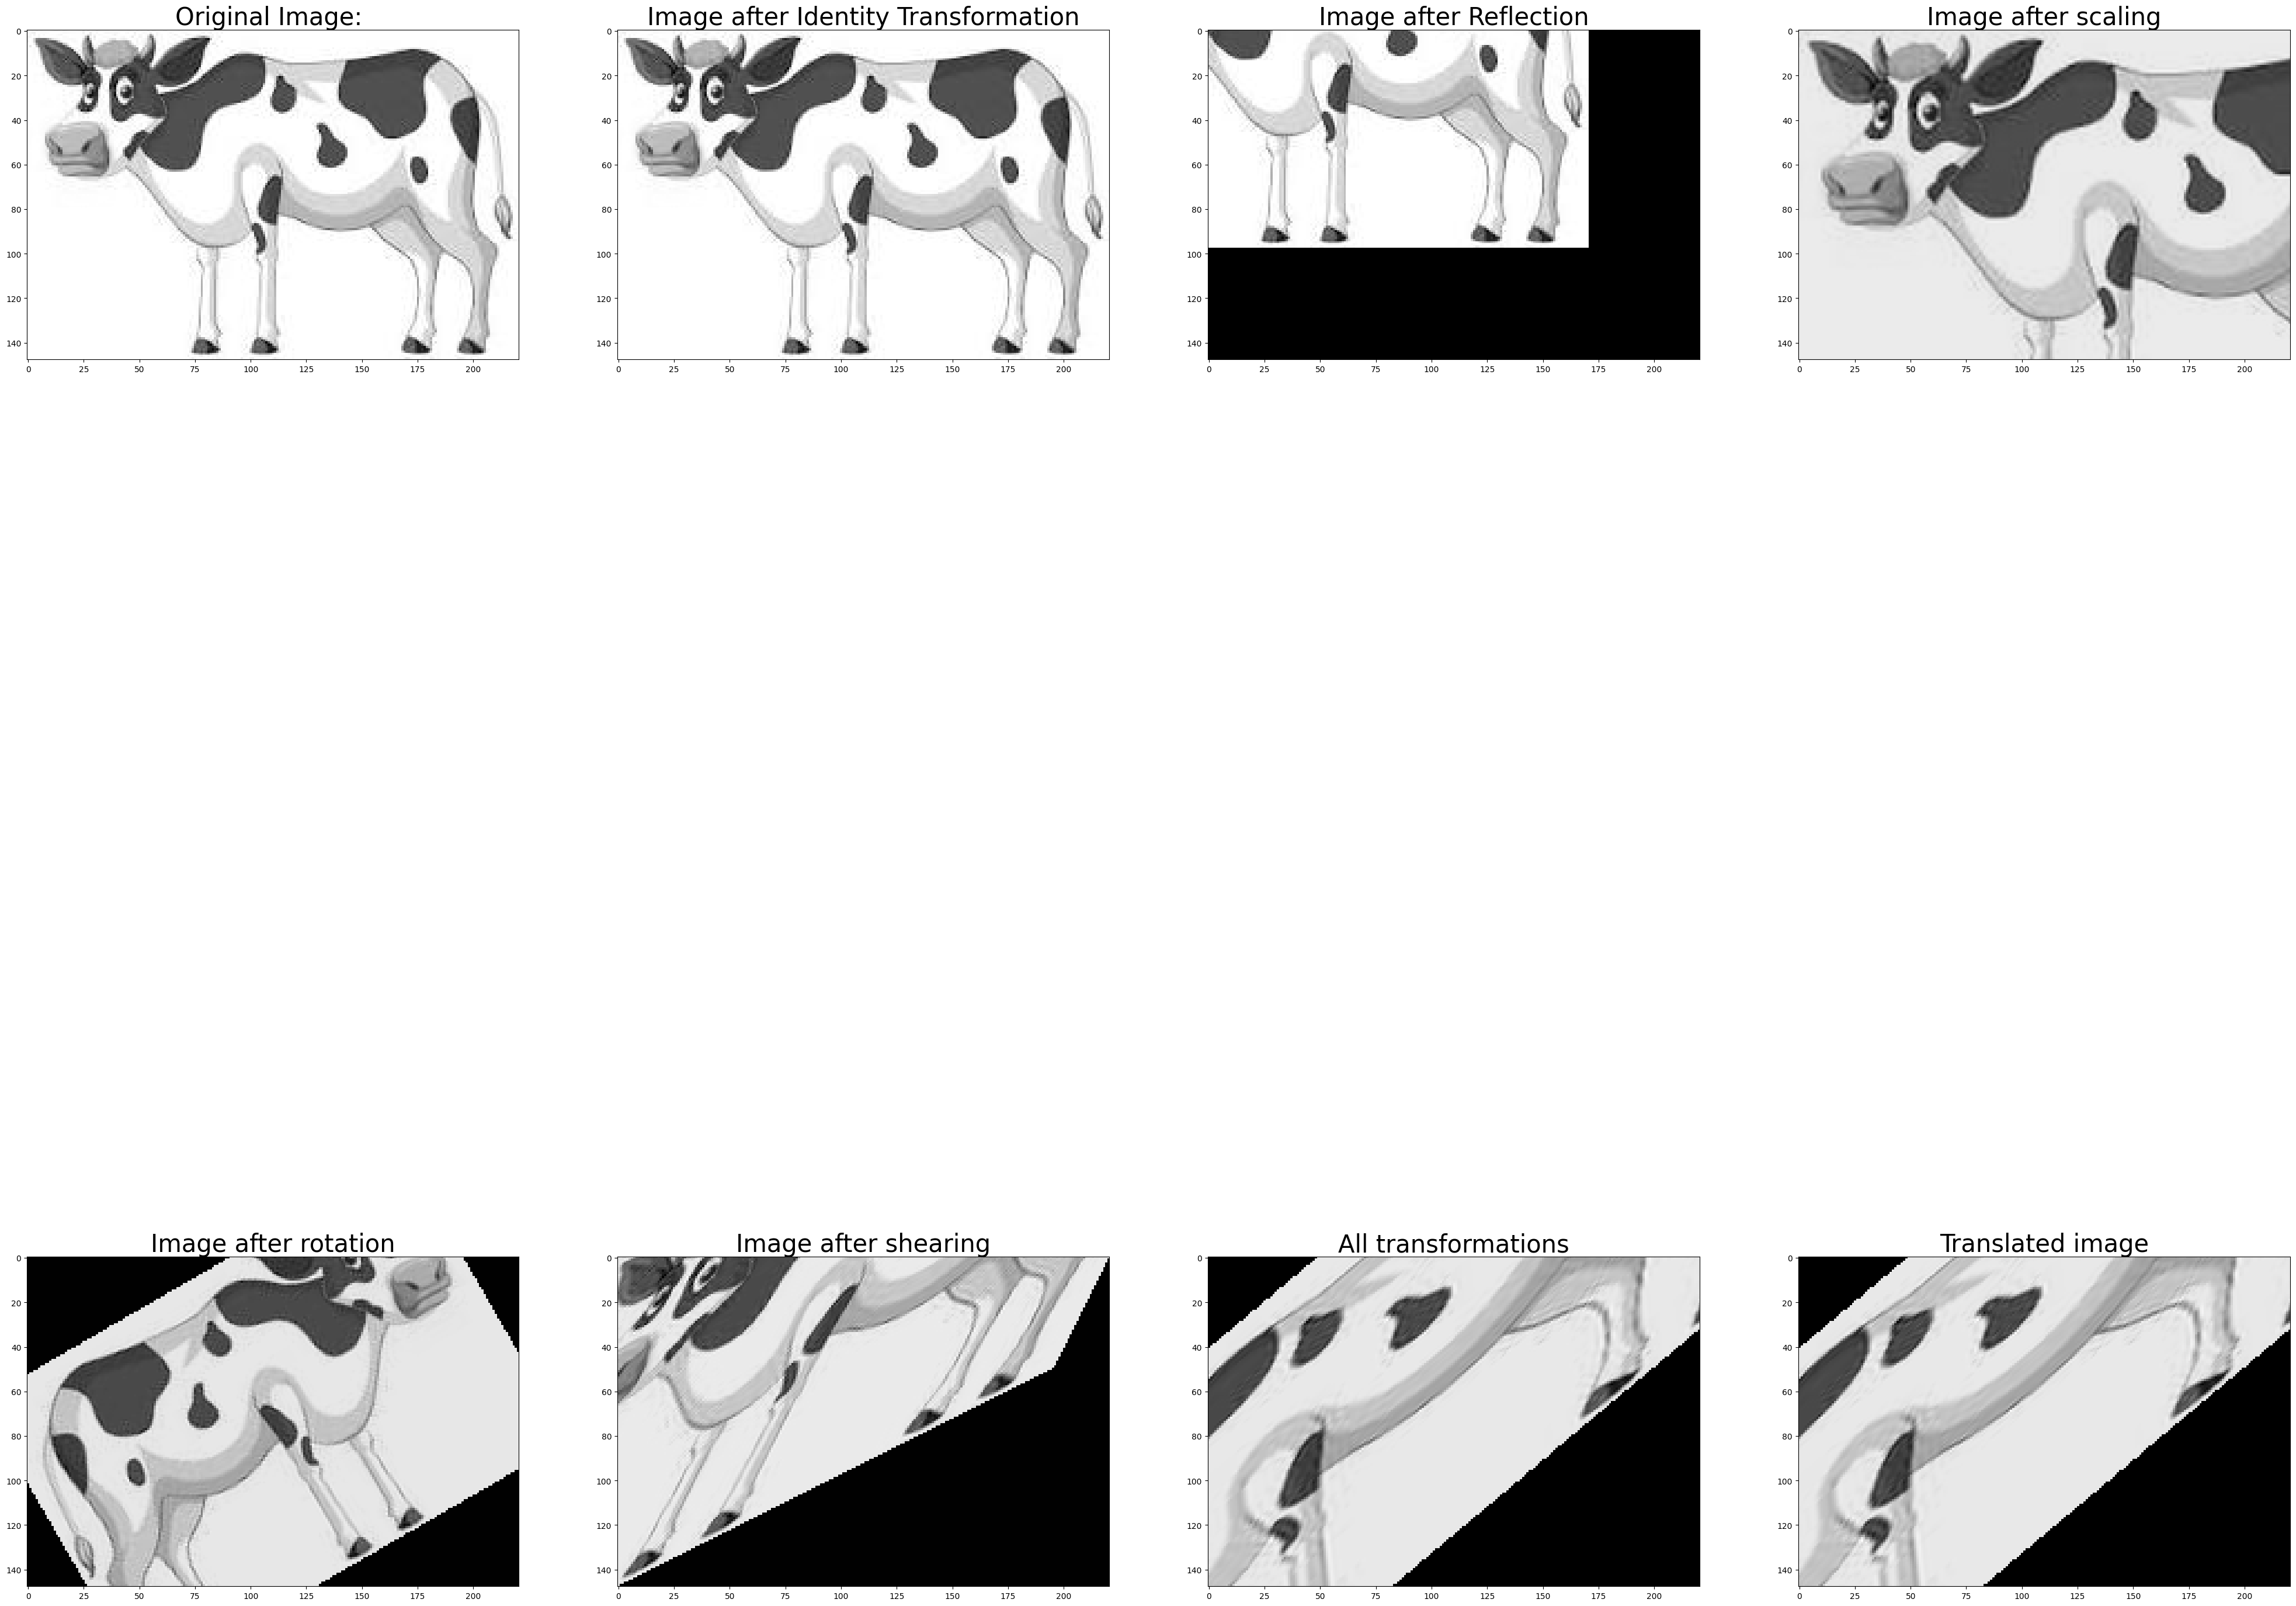

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(50, 50))
ax[0, 0].imshow(img,"gray")
ax[0, 0].set_title("Original Image: ",fontsize = 30)
ax[0, 1].imshow(img1,"gray")
ax[0, 1].set_title("Image after Identity Transformation",fontsize = 30)
ax[0, 2].imshow(img2,"gray")
ax[0, 2].set_title("Image after Reflection",fontsize = 30)
ax[0, 3].imshow(img3, "gray")
ax[0, 3].set_title("Image after scaling",fontsize = 30)
ax[1, 0].imshow(img4,"gray")
ax[1, 0].set_title("Image after rotation",fontsize = 30)
ax[1, 1].imshow(img5, "gray")
ax[1, 1].set_title("Image after shearing",fontsize = 30)
ax[1, 2].imshow(final, "gray")
ax[1, 2].set_title("All transformations",fontsize = 30)
ax[1, 3].imshow(final, "gray")
ax[1, 3].set_title("Translated image",fontsize = 30)